In [224]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

<b>Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?</b>

In [225]:
initial_value = 120000
rate = 0.05
number_period = 5
payment = 0

house_price = round(np.abs(npf.fv(rate, number_period, payment, initial_value)),3)

print(f"Orientacyjna cena mieszkania wynosi: {house_price} zł")


Orientacyjna cena mieszkania wynosi: 153153.788 zł


<b>Ile musisz wpłacać do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat?</b>

In [226]:
amount_periods = 60
proc = 0.05/12
initial_capital = 1000
payment_per_month = npf.pmt(proc, amount_periods, -initial_capital, house_price)
print(f"Co miesiąc muszę wpłacać {np.abs(round(payment_per_month,3))} zł")

Co miesiąc muszę wpłacać 2233.189 zł


<b>Stwórz wykres przedstawiający, jak w interwałach miesięcznych zmieniać się będzie cena mieszkania (liniowy wzrost w całym okresie) oraz wartość twojej lokaty.</b>

In [227]:
periods = np.arange(1,5*12+1,dtype=int)
deposit_values_by_five_years = np.around(npf.ppmt(proc, periods, amount_periods, -house_price),3).cumsum()
deposit_values_by_five_years


array([  2252.06 ,   4513.504,   6784.37 ,   9064.698,  11354.528,
        13653.899,  15962.85 ,  18281.422,  20609.655,  22947.589,
        25295.264,  27652.721,  30020.001,  32397.144,  34784.192,
        37181.186,  39588.168,  42005.179,  44432.261,  46869.456,
        49316.806,  51774.353,  54242.14 ,  56720.209,  59208.603,
        61707.366,  64216.54 ,  66736.169,  69266.296,  71806.966,
        74358.222,  76920.108,  79492.669,  82075.949,  84669.992,
        87274.844,  89890.549,  92517.153,  95154.701,  97803.239,
       100462.813, 103133.468, 105815.251, 108508.208, 111212.386,
       113927.831, 116654.59 , 119392.711, 122142.241, 124903.227,
       127675.717, 130459.759, 133255.401, 136062.692, 138881.68 ,
       141712.414, 144554.943, 147409.315, 150275.581, 153153.789])

In [230]:
periods = np.arange(1,5*12+1,dtype=int)
arr_increase_value_per_month = np.around(npf.ppmt(rate/12, periods, number_period*12, initial_value, -house_price),3)
arr_increase_value_per_month = arr_increase_value_per_month.cumsum() + initial_value
arr_increase_value_per_month

array([120487.512, 120977.055, 121468.638, 121962.269, 122457.957,
       122955.711, 123455.539, 123957.449, 124461.45 , 124967.551,
       125475.761, 125986.089, 126498.543, 127013.132, 127529.865,
       128048.752, 128569.801, 129093.021, 129618.421, 130146.01 ,
       130675.797, 131207.792, 131742.003, 132278.44 , 132817.112,
       133358.029, 133901.2  , 134446.634, 134994.34 , 135544.329,
       136096.609, 136651.19 , 137208.082, 137767.294, 138328.836,
       138892.718, 139458.95 , 140027.541, 140598.501, 141171.84 ,
       141747.568, 142325.695, 142906.231, 143489.186, 144074.57 ,
       144662.393, 145252.665, 145845.397, 146440.598, 147038.279,
       147638.451, 148241.123, 148846.306, 149454.011, 150064.248,
       150677.028, 151292.361, 151910.258, 152530.73 , 153153.787])

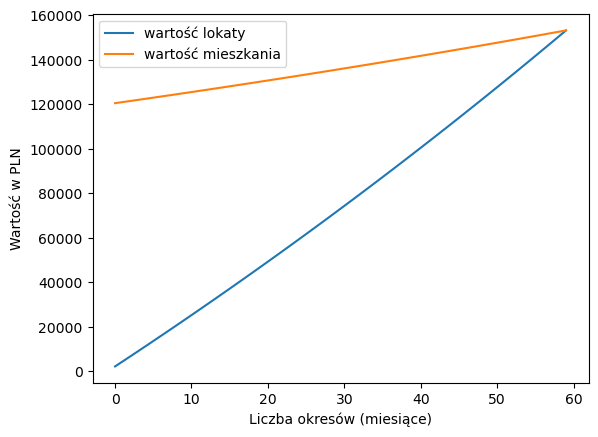

In [229]:
plt.plot(deposit_values_by_five_years,label='wartość lokaty')
plt.plot(arr_increase_value_per_month,label='wartość mieszkania')
plt.xlabel('Liczba okresów (miesiące)')
plt.ylabel('Wartość w PLN')
plt.legend()
plt.show()
